## Simple Linear Regression

Here we will try to see that if we can make a regression model to predict one column of a dataset by the use of other coloumn.
Dataset
Population of U.S. Cities
## Description
The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.
## Format
This data frame contains the following columns:
u The 1920 population.
x The 1930 population.
There is one unnamed column also in this dataset. Please remove and ignore that coloumn.
Source
The data were obtained from
Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley
References
Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.


In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

## Question 1 Read the dataset given in file named 'bigcity.csv'.
## And check the dataset for any missing values and also print out the correlation matrix

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [3]:
city_df = pd.read_csv("bigcity.csv")

In [4]:
city_df.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [5]:
city_df = city_df.drop("Unnamed: 0", axis=1)

In [6]:
city_df.shape

(49, 2)

In [7]:
city_df.dtypes

u    int64
x    int64
dtype: object

In [8]:
city_df

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75
5,37,63
6,29,50
7,23,48
8,30,111
9,2,50


In [9]:
city_df.isnull().sum()

u    0
x    0
dtype: int64

In [10]:
city_df.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


The high correlation betwwen u and x indicates that the variable u can be a good predictor of variable x

## Question 2 - Transform the dataset and Split data into train, test sets.
Find the number of rows in given dataset and separate the input(u column)  and target variables(x column) into X and Y.

Remove the unnamed coloumn.

Hint: You can shape function to get the size of the dataframe.
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [11]:
X = city_df[['u']]
Y = city_df[['x']]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20 , random_state=48)

In [14]:
X_train.shape

(39, 1)

In [15]:
X_test.shape

(10, 1)

In [16]:
y_train.shape

(39, 1)

In [17]:
y_test.shape

(10, 1)

## Question 3 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
print("Coefficient is ", model.coef_[0][0])

Coefficient is  1.1898529574414585


In [21]:
print("Intercept is ", model.intercept_[0])

Intercept is  2.310352850498674


## Question 4 - Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.
Hint - y = mx + c, plot y

In [22]:
import seaborn as sns

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


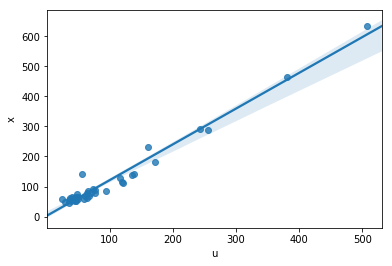

In [23]:
sns.regplot(x=X_train['u'],y=y_train['x'])

## Question 5 - Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. 
Performing root operation over mean square error over mean square error gives you root mean square error

In [24]:
y_predict = model.predict(X_test)

In [25]:
mse = np.mean((y_predict-y_test)**2)

In [26]:
import math

math.sqrt(mse)

33.95921689487067

In [27]:
from sklearn import metrics

In [28]:
math.sqrt(metrics.mean_squared_error(y_test, y_predict))

33.95921689487067

In [29]:
metrics.r2_score(y_test,y_predict)

0.9330538126741319

## Question 6 - Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [38]:
model.score(X_train,y_train)
model.score(X_test, y_test)

0.9709915109809382

0.9330538126741318

# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [31]:
#Import all the necessary modules


## Q7. Load the PIMA Indian Diabetes file into Python DataFrame. And print 10 samples from the dataset


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [39]:
pima_df = pd.read_csv("pima-indians-diabetes.csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

In [40]:
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Q8 Print the datatypes of each column and the shape of the dataset. And replace all the 0s in the column with the median of the same column value accordingly.

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


In [41]:
pima_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Class                         int64
dtype: object

In [43]:
pima_df.shape

(768, 9)

In [49]:
pima_df.Glucose[pima_df.Glucose == 0].count()
pima_df.BloodPressure[pima_df.BloodPressure == 0].count()
pima_df.SkinThickness[pima_df.SkinThickness == 0].count()
pima_df.Insulin[pima_df.Insulin == 0].count()
pima_df.BMI[pima_df.BMI == 0].count()
pima_df.DiabetesPedigreeFunction[pima_df.DiabetesPedigreeFunction == 0].count()
pima_df.Age[pima_df.Age == 0].count()


5

35

227

374

11

0

0

In [51]:
pima_df['Glucose'] = pima_df['Glucose'].replace(0,pima_df.Glucose.median() )
pima_df.Glucose[pima_df.Glucose == 0].count()

0

In [52]:
pima_df['BloodPressure'] = pima_df['BloodPressure'].replace(0,pima_df.BloodPressure.median() )
pima_df.BloodPressure[pima_df.BloodPressure == 0].count()

0

In [53]:
pima_df['SkinThickness'] = pima_df['SkinThickness'].replace(0,pima_df.SkinThickness.median() )
pima_df.SkinThickness[pima_df.SkinThickness == 0].count()

0

In [54]:
pima_df['Insulin'] = pima_df['Insulin'].replace(0,pima_df.Insulin.median() )
pima_df.Insulin[pima_df.Insulin == 0].count()

0

In [55]:
pima_df['BMI'] = pima_df['BMI'].replace(0,pima_df.BMI.median() )
pima_df.BMI[pima_df.BMI == 0].count()

0

## Q9 See the distribution of 'Class' variable and plot it using appropriate graph.

## Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

Using the plot - infer the relationship between different variables

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **pa

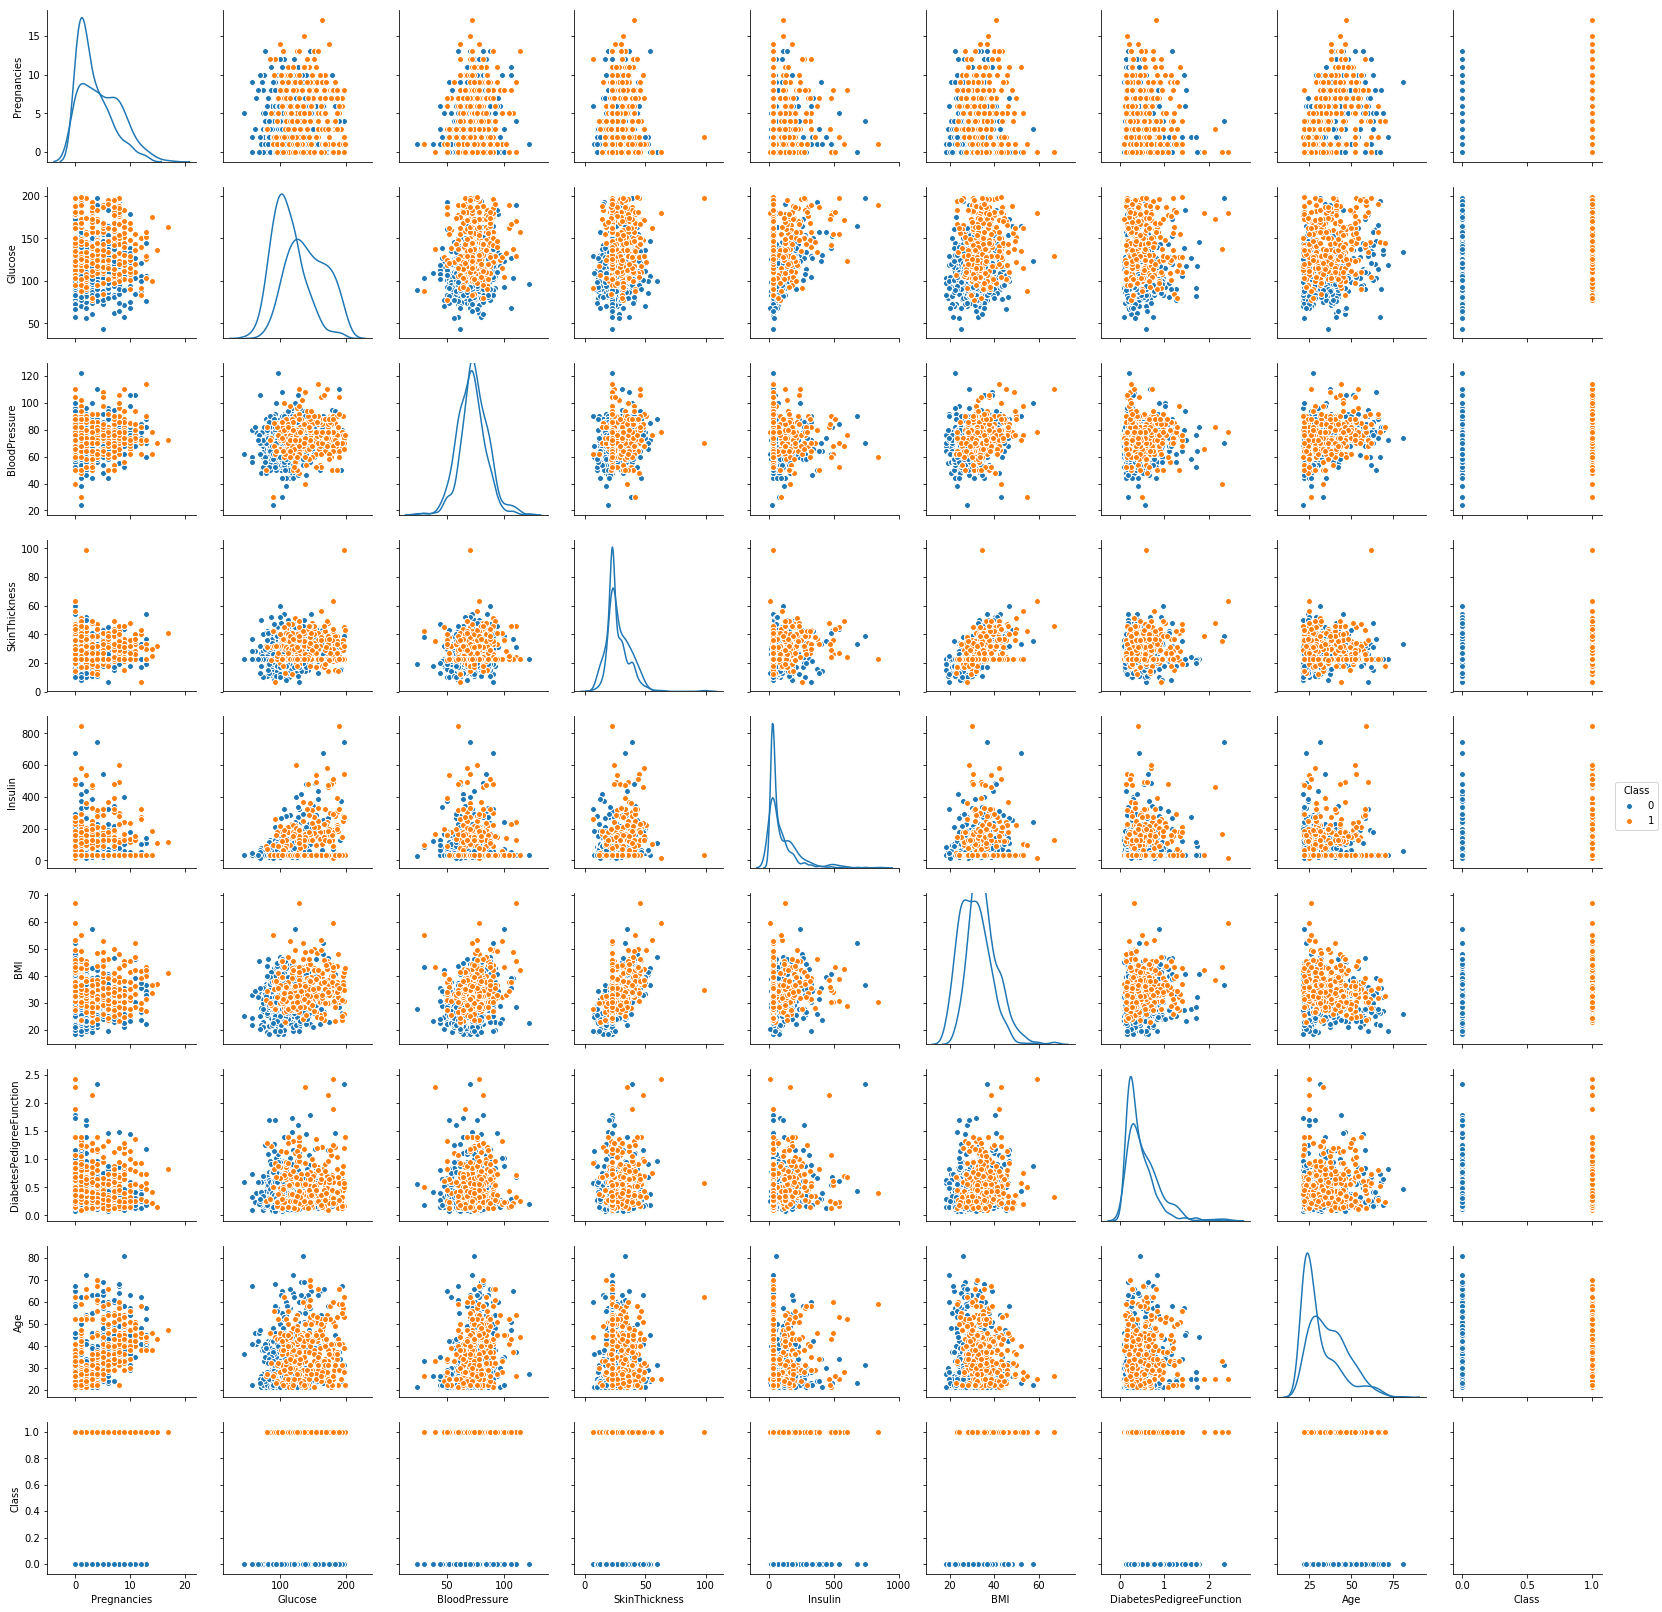

In [57]:
sns.pairplot(pima_df, diag_kind='kde', hue = 'Class')

## Q10 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test). And create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.


In [59]:
X=pima_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y=pima_df['Class']

In [60]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=0)

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
model=DecisionTreeClassifier(criterion = 'entropy')
model.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Q11 Print the accuracyof the model and print the confusion matrix.

In [64]:
ypred=model.predict(xtest)

In [65]:
acc=metrics.accuracy_score(ytest,ypred)
print(acc)

0.7402597402597403


In [67]:
print(metrics.confusion_matrix(ytest,ypred))

[[125  32]
 [ 28  46]]


Print the feature importance of the decision model - Optional

In [68]:
print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = xtrain.columns))

                               Imp
Pregnancies               0.070506
Glucose                   0.315376
BloodPressure             0.041845
SkinThickness             0.033829
Insulin                   0.014948
BMI                       0.230580
DiabetesPedigreeFunction  0.132116
Age                       0.160800


## Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [69]:
from sklearn.ensemble import RandomForestClassifier

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [70]:
Rf_model = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=3,random_state=0 )

In [71]:
Rf_model.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [72]:
y_predict_Rf=Rf_model.predict(xtest)

In [73]:
print(metrics.accuracy_score(ytest,y_predict_Rf))

0.7619047619047619


## Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [77]:
from sklearn.ensemble import AdaBoostClassifier
abc_model = AdaBoostClassifier(base_estimator=model,n_estimators= 51)
abc_model.fit(xtrain,ytrain)
y_pred_abc=abc_model.predict(xtest)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=51, random_state=None)

In [78]:
metrics.accuracy_score(ytest,y_pred_abc)

0.7359307359307359

## Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [79]:
from sklearn.ensemble import BaggingClassifier
#Default base estimator is Decision Tree (CART)

bgc_model = BaggingClassifier(base_estimator=model,n_estimators=51)
bgc_model.fit(xtrain,ytrain)
ypred_bgc= bgc_model.predict(xtest)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=51, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [80]:
metrics.accuracy_score(ytest,ypred_bgc)

0.7922077922077922

## Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model = GradientBoostingClassifier(n_estimators = 51)
gbc_model.fit(xtrain,ytrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=51,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [82]:
y_predict_gbc=gbc_model.predict(xtest)

In [83]:
metrics.accuracy_score(ytest,y_predict_gbc)

0.7792207792207793

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [87]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [90]:
array = pima_df.values
X = array[:,0:7] # select all rows and first 8 columns which are the attributes
Y = array[:,8]

In [91]:
enclf = VotingClassifier(estimators = [('Rf', Rf_model), ('dt', model)], voting = 'hard')

In [92]:
for clf, label in zip([Rf_model, model], ['RandomForest', 'DecisionTree']):
    scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')
    print("Accuracy: %0.02f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label ))

Accuracy: 0.74 (+/- 0.02) [RandomForest]
Accuracy: 0.69 (+/- 0.03) [DecisionTree]


In [ ]:
# I will go for RandomForest as the accuracy is higher with a relatively lower variance